# NumPy and its basics


creating a nDarray


In [ ]:
# making a numpy nd array
import numpy as np
data=np.random.rand(2,3) # create a 2x3 array
data*=10
data+data
data.shape # dimension of the array
data.size # prints no of elements
data.dtype # prints datatype
data.ndim # prints no of dimensions

2

creating a zero initialised or empty ndarray


In [ ]:
# np.empty() it creates an array without initialising its values. The values are whatever is in memory at that time.
data2=np.empty((2,3,2))
data2
# to create arrays initialised wit zeroes
data3=np.zeros((2,3,2))
data3

array([[[0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.]]])

**Type casting** : To convert or cast an array from one dtype to another using ndarray's: _astype()_ method.


In [ ]:
arr=np.array([[1,2,3],[4,5,6]])
arr.dtype
float_arr=arr.astype('float64') # type casting
float_arr.dtype 

dtype('float64')

In [ ]:
arr=np.array([['a','B','A'],['4','0','e']])
arr.dtype
#arr.astype('int')# gives error cant cange char to int like this
arr_int=np.vectorize(ord)(arr)
arr_int.dtype
arr_int
# string to int possible only if all are numeric
arr=np.array([['1','2','3'],['4','5','6']])
arr_int=arr.astype('int')
arr_int

array([[1, 2, 3],
       [4, 5, 6]])

we sould be cautious when using numpy.string\_ type as string data in NumPy is fixed size and may truncate input witout warning.


## Arithmetic with NumPy Arrays


This is mostly called as _vectorisation_ by NumPy users. Any arithmetic operation between equal-size arrays applies te operation element wise.


In [ ]:
arr=np.array([[1,2,3],[4,5,6]])
mult_arr=arr*arr # element wise multiplication
mult_arr
add_arr=arr+arr # element wise addition
add_arr
arr2=np.array([[0,5,9],[4,5,6]])
sub_arr=arr-arr2 # element wise subtraction
sub_arr

array([[ 1, -3, -6],
       [ 0,  0,  0]])

Arithmetic operations with scalar propagate te scalar arguments to eac elements.


In [ ]:
2/arr # element wise division
arr2/arr # element wise division with another array
arr2**0.5 # square root
arr2>arr # element wise comparison

array([[False,  True,  True],
       [False, False, False]])

## Basic Indexing and Slicing


In [ ]:
arr = np.random.randint(0, 100, 10)
arr[5:8]  # slicing includes start index and excludes end index
arr2=arr[5:] # slicing from index 5 to end
arr2[2]=0
print("arr2:", arr2)
arr[8:]=np.array([1,2]) # slicing from index 8 to end
print("arr:", arr)

arr2: [94 80  0 11 94]
arr: [ 3  4  3 66 72 94 80  0  1  2]


In [ ]:
arr_3d= np.random.randint(0, 100, (2, 3, 4))
#accessing a 3d array 
print(arr_3d)
print(arr_3d[0, 1])
print(arr_3d[0, 1, 2])

# slicing a 3d array
print("\nFrom Matrix 1, all rows, 3rd column from each row:")
print(arr_3d[1,:,2]) # first for 1d then next for `2d` and last for `3d
print("\nFrom every matrix, the 2nd row, all columns:")
print(arr_3d[:, 1, :]) 
# slicing a 3d array with multiple rows
print("\nFrom every matrix, rows 1 and 2, all columns:")
print(arr_3d[:, 1:3, :])


[[[27 57 92 57]
  [16 90 30 91]
  [78 75 16 89]]

 [[17 28 79 93]
  [ 6 22 36 58]
  [27 28 70 44]]]
[16 90 30 91]
30

From Matrix 1, all rows, 3rd column from each row:
[79 36 70]

From every matrix, the 2nd row, all columns:
[[16 90 30 91]
 [ 6 22 36 58]]

From every matrix, rows 1 and 2, all columns:
[[[16 90 30 91]
  [78 75 16 89]]

 [[ 6 22 36 58]
  [27 28 70 44]]]


### Boolean Indexing


In [ ]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4)
# boolean indexing
print("Data for 'Bob':")
for i in range(len(names)):
    if names[i] == 'Bob':
        print(data[i])

# boolean indexing with numpy Same as above but more efficient
print("\nData for 'Bob' using boolean indexing:")
mask = (names == 'Bob') 
data[mask] 
# or can also be done like this
data[names == 'Bob']
# then slicing can be done on the result
print("\nData for 'Bob' or 'Joe' with slicing:")
data[(names == 'Bob') | (names == 'Joe')][:, 2:4]  


Data for 'Bob':
[-0.68979558 -1.00677598  0.13607366 -1.24921743]
[-0.94370258  0.18424928 -0.34728019 -1.72525291]

Data for 'Bob' or 'Joe' with slicing:


array([[ 0.13607366, -1.24921743],
       [ 1.15774392, -0.66627486],
       [-0.34728019, -1.72525291],
       [-0.54630892, -1.27050819],
       [-1.81747532,  0.48666766]])

Setting values wit boolean arrays works. Say want to set value of data to 7 if te name is not Joe.


In [ ]:
data[names !='Joe']=7
data
# same as
for i in range(len(names)):
    if names[i] != 'Joe':
        data[i] = 7 
data

# Example 2
data[data < 0] = 0 # setting negative values to 0
data

array([[7.        , 7.        , 7.        , 7.        ],
       [0.13779353, 0.        , 1.15774392, 0.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.52465045, 0.35215325, 0.        , 0.48666766]])

## Transposing Array and Swapping Axes


Transposing is a special type of Reshape were the rows becomes the column and col as row. It similarly returns a view on the underlying data without changing any data. Special attribute of it is _'T'_


In [ ]:
# reshape
arr=np.arrange(15).reshape((3, 5)) # reshape to 3 rows and 5 columns
print("\nReshaped Array:")
print(arr)
#Transposing 
transposed_arr = arr.T 
print("\nTransposed Array:")   
print(transposed_arr)

## Universal Function : First Element-wise Array Functions


Few Common universal Functions are:

1. abs,fabs : compute absolute value element wise, floating point,complex nos
2. sqrt : Compute the square root
3. square : Compute the square of each element
4. exp : Compute the exponent of each element
5. sign :
6. ceil,floor :
7. log,log 10,log 2,log 1p :
8. isnan :
9. rint :
10. isfinite, isinf :
11. logical_not :


In [ ]:
import numpy as np
arr=np.arange(10)
print(arr)
# Element-wise square root
print("\nSquare root of each element:")
print(np.sqrt(arr))


[0 1 2 3 4 5 6 7 8 9]

Square root of each element:
[0.         1.         1.41421356 1.73205081 2.         2.23606798
 2.44948974 2.64575131 2.82842712 3.        ]


use of modf and fabs


In [ ]:
arr=np.random.randn(7)*5
print("Original Array:", arr)
remainder,whole=np.modf(arr) # returns fractional and whole part of the array
print("\nAbsolute values:",np.fabs(arr))
print("\nRemainder:", remainder)  
print("\nWhole:", whole)  # prints whole part of the array

Original Array: [ 4.36106069 -8.10254858 -4.83001326 -0.73797325  4.89921375  1.88686194
  1.7170945 ]
Absolute values: [4.36106069 8.10254858 4.83001326 0.73797325 4.89921375 1.88686194
 1.7170945 ]

Remainder: [ 0.36106069 -0.10254858 -0.83001326 -0.73797325  0.89921375  0.88686194
  0.7170945 ]

Whole: [ 4. -8. -4. -0.  4.  1.  1.]


In [ ]:
arr=np.random.randn(10)*5
print("Original Array:", arr)
# Element-wise square root
print("\nSquare root of each element:")
arr=np.sqrt(arr) 
print(arr)
print(np.isnan(arr)) # checks for NaN values
print(np.isinf(arr))# checks for infinite values
print(np.isfinite(arr)) # checks for finite values

Original Array: [-0.16992395 -3.66137718 -1.74630717  5.05801064 -7.98319617  4.39967007
 -7.30410385 -2.64466443 -0.08858375 -1.64206424]

Square root of each element:
[       nan        nan        nan 2.24900214        nan 2.09753905
        nan        nan        nan        nan]
[ True  True  True False  True False  True  True  True  True]
[False False False False False False False False False False]
[False False False  True False  True False False False False]


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9668\3840325361.py:5: RuntimeWarning: invalid value encountered in sqrt
  arr=np.sqrt(arr)


## Array oriented Programming with Arrays


1. np.meshgrid() : X-> Here each row is a copy of x
   Y-> Here eac column is a copy of y.
   These 2D arrays represent a grid of points for evaluating functions over a rectangular domain


X:
 [[1 2 3]
 [1 2 3]]
Y:
 [[4 4 4]
 [5 5 5]]


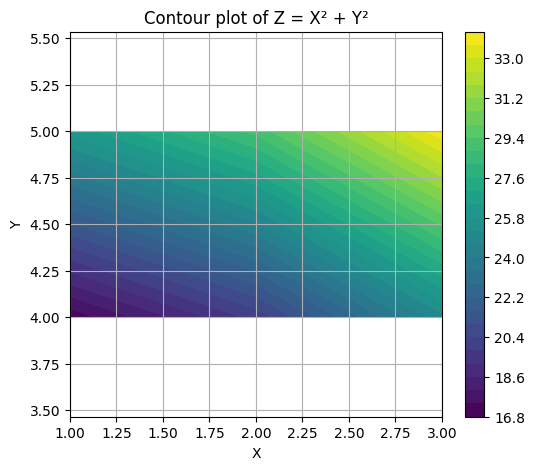

None


In [10]:
import numpy as np
x=np.array([[1, 2, 3]])
y=np.array([[4, 5]])
X,Y=np.meshgrid(x, y) 
print("X:\n", X)
print("Y:\n", Y)
Z = X**2 + Y**2
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
contour = plt.contourf(X, Y, Z, levels=30, cmap='viridis')
plt.colorbar(contour)
plt.title('Contour plot of Z = X² + Y²')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.grid(True)
plt.show()

print(plt.show())



Each pair (X[i][j] , Y[i][j]) corresponds to a point on the 2D grid


## Expressing Conditional logic as Array


In [14]:
xarr=np.array([1.1,2.2,1.4,3.5,4.6])
yarr=np.array([1.2,2.3,1.5,3.6,4.7])
cond= np.array([True, False, True, False, True])  # condition array
result = np.where(cond, xarr, yarr)  # if cond is True, use xarr, else use yarr
print("Resulting array:", result)

arr=np.random.randn(4,4)
print("\nOriginal Array:", arr)
print("\nArray with positive values replaced by themselves, others by -2:")
print(np.where(arr > 0, arr, -2))  

Resulting array: [1.1 2.3 1.4 3.6 4.6]

Original Array: [[ 1.75898236  1.83603941 -0.53578023 -0.34632096]
 [-0.21897061  1.06914912  0.62074599  0.63297228]
 [ 0.30035139  0.79911884 -0.31355478 -1.6566107 ]
 [ 1.16729899 -0.72879299  2.39244015  1.82783242]]

Array with positive values replaced by themselves, others by -2:
[[ 1.75898236  1.83603941 -2.         -2.        ]
 [-2.          1.06914912  0.62074599  0.63297228]
 [ 0.30035139  0.79911884 -2.         -2.        ]
 [ 1.16729899 -2.          2.39244015  1.82783242]]
